In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Dense, Conv1D, MaxPooling1D, Flatten, LeakyReLU, Input, Average
from tensorflow import keras
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import pandas as pd

In [2]:
TRAIN_SET = '../mit_train_set.pickle'
TEST_SET = '../mit_test_set.pickle'

with open(TEST_SET, 'rb') as file:
    test_set = pickle.load(file)
    x_test = test_set['x']
    y_test = test_set['y']

with open(TRAIN_SET, 'rb') as file:
    train_set = pickle.load(file)
    x_train = train_set['x']
    y_train = train_set['y']
    
x_train_mlp = x_train
x_test_mlp = x_test

x_train = tf.expand_dims(x_train, axis=2)
x_test = tf.expand_dims(x_test, axis=2)

In [3]:
num_classes = 5
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [10]:
CNN_model  = keras.models.load_model('CNN_REP_MITBIH')
LSTM_model = keras.models.load_model('LSTM_REP_MITBIH')
MLP_model  = keras.models.load_model('MLP_REP_MITBIH')

In [14]:
inputs = Input(shape=x_train.shape[1:])
cnn = CNN_model(inputs)
lstm = LSTM_model(inputs)
mlp = MLP_model(inputs)

y = Average()([cnn, lstm, mlp])


model = Model(inputs = inputs, outputs = y)

In [15]:
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [16]:
history = model.fit(x_train_mlp, y_train,
              batch_size=64,
              epochs=20,
              validation_data=(x_test_mlp, y_test))

Epoch 1/20
1563/1563 [==============================] - 161s 101ms/step - loss: 0.0617 - accuracy: 0.9865 - val_loss: 0.3287 - val_accuracy: 0.9268
Epoch 2/20
1563/1563 [==============================] - 177s 113ms/step - loss: 0.0603 - accuracy: 0.9868 - val_loss: 0.3845 - val_accuracy: 0.9137
Epoch 3/20
1563/1563 [==============================] - 178s 114ms/step - loss: 0.0596 - accuracy: 0.9866 - val_loss: 0.3472 - val_accuracy: 0.9234
Epoch 4/20
1563/1563 [==============================] - 176s 112ms/step - loss: 0.0645 - accuracy: 0.9859 - val_loss: 0.4140 - val_accuracy: 0.9251
Epoch 5/20
1563/1563 [==============================] - 173s 111ms/step - loss: 0.0597 - accuracy: 0.9871 - val_loss: 0.4048 - val_accuracy: 0.9183
Epoch 6/20
1563/1563 [==============================] - 163s 104ms/step - loss: 0.0614 - accuracy: 0.9870 - val_loss: 0.3958 - val_accuracy: 0.9163
Epoch 7/20
1563/1563 [==============================] - 174s 112ms/step - loss: 0.0620 - accuracy: 0.9861 - val_

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
def plot_history(history):
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model Loss')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.show()
    
def plot_confusion(model, name):
    predictions = model.predict(x_test)
    matrix = confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))
    df_cm = pd.DataFrame(matrix, range(5), range(5))
    plt.figure(figsize=(10,7))
    sn.set(font_scale=1.4) 
    labels = ["Normal", "Supraventricular Ectopic", "Ventricular Ectopic", "Fusion", "Unknown"]
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}, xticklabels=labels, yticklabels=labels)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(name)
    plt.show()

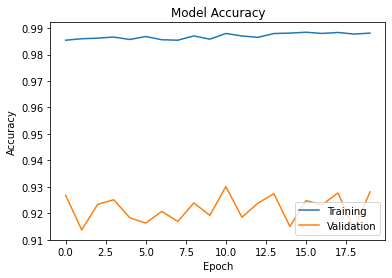

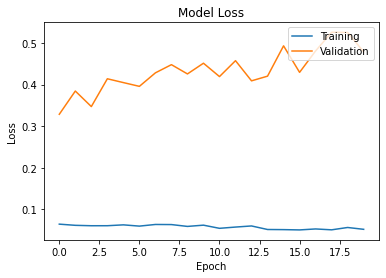

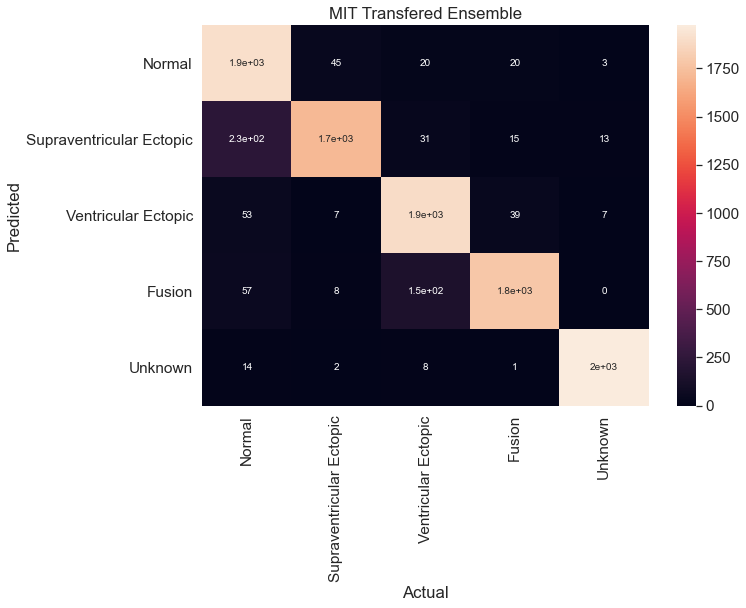

In [18]:
plot_history(history)
plot_confusion(model, "MIT Transfered Ensemble")